In [1]:
import RATapi as RAT
from RATapi.models import Layer, Parameter

# Domains Samples Using Standard Layers

Domains standard layers projects proceed in much the same way as a normal standard layers problem, except that there is an additional grouping step between layers and contrasts.

Layers are grouped into 'Domain Contrasts'. The model for the actual experimental contrast is built from these domain contrasts rather than from layers. There are exactly two domains for each contrast, with the the ratio of them controlled by a fittable 'domain ratio' parameter.

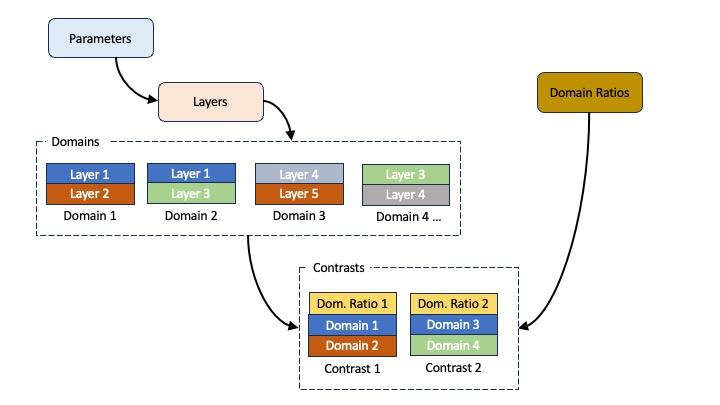

In this we will set up a simple example of a simulated system consisting of two layered domains to illustrate this process.

Start by making the project, specifying that this is a domains calculation:

In [2]:
problem = RAT.Project(calculation="domains")

Define the parameters we need to define our two domains:

In [3]:
parameter_list = [
    Parameter(name="L1 Thickness", min=5.0, value=20.0, max=60.0, fit=True),
    Parameter(name="L1 SLD", min=3.0e-6, value=4.1e-6, max=5.0e-6, fit=False),
    Parameter(name="L1 Roughness", min=2.0, value=5.0, max=20.0, fit=True),
    Parameter(name="L1 Hydration", min=10.0, value=20.0, max=30.0, fit=True),
    Parameter(name="L2 Thickness", min=5.0, value=60.0, max=100.0, fit=True),
    Parameter(name="L2 SLD", min=2.1e-6, value=3.0e-6, max=5.0e-6, fit=False),
    Parameter(name="L2 Roughness", min=2.0, value=5.0, max=20.0, fit=True),
    Parameter(name="L2 Hydration", min=10.0, value=20.0, max=30.0, fit=True),
    Parameter(name="L3 Thickness", min=5.0, value=200.0, max=300.0, fit=True),
    Parameter(name="L3 SLD", min=3.0e-6, value=7.0e-6, max=8.0e-6, fit=False),
    Parameter(name="L3 Roughness", min=2.0, value=5.0, max=20.0, fit=True),
    Parameter(name="L3 Hydration", min=10.0, value=20.0, max=30.0, fit=True)
]

problem.parameters.extend(parameter_list)

Now group these into layers as usual:

In [4]:
layers = [
Layer(name="Layer 1", thickness="L1 Thickness", SLD="L1 SLD", roughness="L1 Roughness", hydration="L1 Hydration", hydrate_with="bulk out"),
Layer(name="Layer 2", thickness="L2 Thickness", SLD="L2 SLD", roughness="L2 Roughness", hydration="L2 Hydration", hydrate_with="bulk out"),
Layer(name="Layer 3", thickness="L3 Thickness", SLD="L3 SLD", roughness="L3 Roughness", hydration="L3 Hydration", hydrate_with="bulk out")
]

problem.layers.extend(layers)

If we look at the project, there are two extra groups as compared to a normal standard layers - Domain Contrasts and Domain Ratios

In [5]:
print(problem)

Calculation: ---------------------------------------------------------------------------------------

domains

Model: ---------------------------------------------------------------------------------------------

standard layers

Geometry: ------------------------------------------------------------------------------------------

air/substrate

Parameters: ----------------------------------------------------------------------------------------

+-------+---------------------+---------+---------+-------+-------+------------+-----+-------+
| index |         name        |   min   |  value  |  max  |  fit  | prior type |  mu | sigma |
+-------+---------------------+---------+---------+-------+-------+------------+-----+-------+
|   0   | Substrate Roughness |   1.0   |   3.0   |  5.0  |  True |  uniform   | 0.0 |  inf  |
|   1   |     L1 Thickness    |   5.0   |   20.0  |  60.0 |  True |  uniform   | 0.0 |  inf  |
|   2   |        L1 SLD       |  3e-06  | 4.1e-06 | 5e-06 | False |  uniform

Now, make a couple of Domain Contrasts

In [6]:
problem.domain_contrasts.append(name="Domain 1", model=["Layer 1"])
problem.domain_contrasts.append(name="Domain 2", model=["Layer 2", "Layer 3"])

Now make a contrast as with standard models, but this time also including the default domain ratio ("Domain Ratio 1"). Note that the model for each experimental contrast **must** have **exactly** two domain contrasts.

In [7]:
problem.contrasts.append(
    name="Domain Test",
    background="Background 1",
    resolution="Resolution 1",
    scalefactor="Scalefactor 1",
    resample=False,
    bulk_in="SLD Air",
    bulk_out="SLD D2O",
    domain_ratio="Domain Ratio 1",
    data="Simulation",
    model=["Domain 1", "Domain 2"],
)

Now we can run our simulation as usual, and plot the results:

Starting RAT ───────────────────────────────────────────────────────────────────────────────────────────────────────────

Elapsed time is 0.004 seconds

Finished RAT ───────────────────────────────────────────────────────────────────────────────────────────────────────────



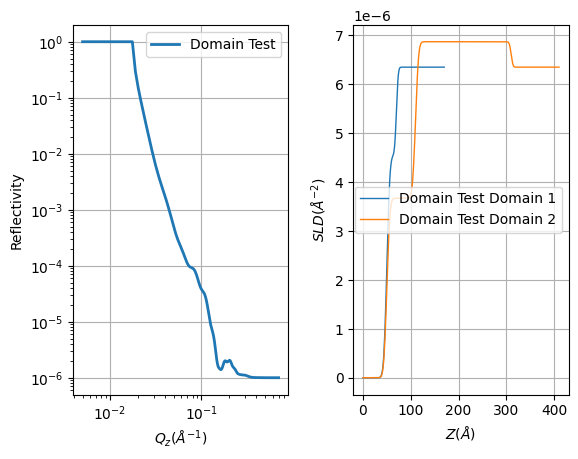

In [8]:
controls = RAT.Controls()
problem, results = RAT.run(problem, controls)

RAT.plotting.plot_ref_sld(problem, results)